## First model: Facebook Prophet

In [1]:
conda install -c conda-forge fbprophet

Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2020.6.24-0, anaconda/win-64::certifi-2020.6.20-py38_0, anaconda/win-64::openssl-1.1.1g-he774522_0
  - anaconda/win-64::ca-certificates-2020.6.24-0, anaconda/win-64::openssl-1.1.1g-he774522_0, defaults/win-64::certifi-2020.6.20-py38_0
  - anaconda/win-64::certifi-2020.6.20-py38_0, anaconda/win-64::openssl-1.1.1g-he774522_0, defaults/win-64::ca-certificates-2020.6.24-0
  - anaconda/win-64::openssl-1.1.1g-he774522_0, defaults/win-64::ca-certificates-2020.6.24-0, defaults/win-64::certifi-2020.6.20-py38_0
  - anaconda/win-64::certifi-2020.6.20-py38_0, defaults/win-64::ca-certificates-2020.6.24-0, defaults/win-64::openssl-1.1.1g-he774522_0
  - defaults/win-64::ca-certificates-2020.6.24-0, defaults/win-64::certifi-2020.6.20-py38_0, defaults/win-64::openssl-1.1.1g-he774522_0
  - anaconda/win-64::ca-certificates-2020.6.24-0, anaconda/win-64::certifi-2020.6.20-py38_0, defaults/win-64::openssl-1.1.1g-he774522_0
  - anaconda

In [2]:
import os
os.chdir('D:\/Downloads-D')

print(os.getcwd())

D:\Downloads-D


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Load the dataset using pandas
data = pd.read_csv("GOOG (1).csv") 
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,527.561584,529.815369,522.665039,523.373108,523.373108,1447500
1,2015-01-05,521.827332,522.894409,511.655243,512.463013,512.463013,2059800
2,2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899900
3,2015-01-07,505.611847,505.855164,498.281952,499.727997,499.727997,2065000
4,2015-01-08,496.626526,502.101471,489.655640,501.303680,501.303680,3353500


In [4]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1.444000e+03
mean,977.145154,986.426554,968.033179,977.652379,977.652379,1.742109e+06
std,276.199422,279.900158,273.121770,276.734560,276.734560,8.449435e+05
min,493.295654,494.618011,486.225067,491.201416,491.201416,3.475000e+05
25%,747.022476,752.599991,738.517517,745.854980,745.854980,1.241350e+06
50%,1013.159973,1024.969971,995.925018,1011.789978,1011.789978,1.527650e+06
75%,1174.862488,1183.712494,1161.587463,1173.325043,1173.325043,1.976000e+06
max,1709.713989,1733.180054,1666.329956,1728.280029,1728.280029,1.116490e+07


In [5]:
# Select only the important features i.e. the date and price
data = data[["Date","Close"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
data.head(5)

,ds,y
0,2015-01-02,523.373108
1,2015-01-05,512.463013
2,2015-01-06,500.585632
3,2015-01-07,499.727997
4,2015-01-08,501.303680


In [6]:
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

Importing plotly failed. Interactive plots will not work.
INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


0        496.925844
1        501.864000
2        505.194093
3        508.707039
4        510.941836
           ...     
2159    2092.599919
2160    2085.094522
2161    2084.749598
2162    2084.510044
2163    2082.966925
Name: yhat, Length: 2164, dtype: float64


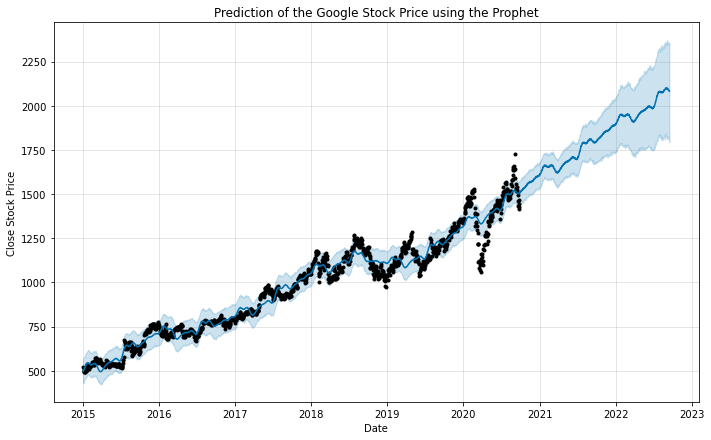

In [7]:
future = m.make_future_dataframe(periods=720) #The number of days we want to predict into the future
prediction = m.predict(future)
print(prediction['yhat'])
m.plot(prediction)
plt.title("Prediction of the Google Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

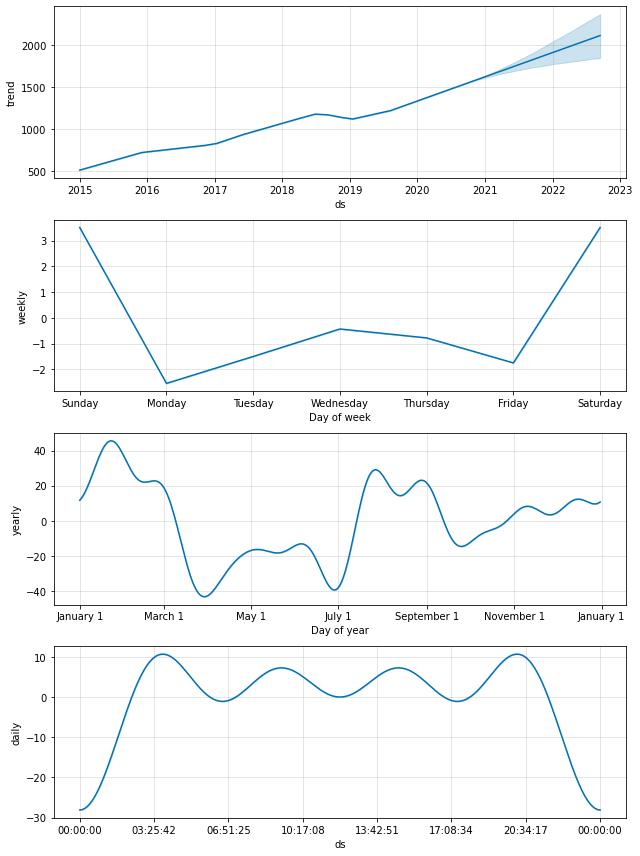

In [8]:
m.plot_components(prediction)
plt.show()

### Test Facebook Prophet ###

In [9]:
train_data2, test_data2 = data[0:int(len(data)*0.6)], data[int(len(data)*0.6):]
train_data2 = train_data2.rename(columns = {"Date":"ds","Close":"y"})
m2 = Prophet(daily_seasonality = True, yearly_seasonality = True) # the Prophet class (model)
m2.fit(train_data2) # fit the model using all data
future2 = m2.make_future_dataframe(periods=578) #we need to specify the number of days in future
prediction2 = m2.predict(future2)
prices = prediction2['yhat'].tolist()
predicted_prices = prices[866:]

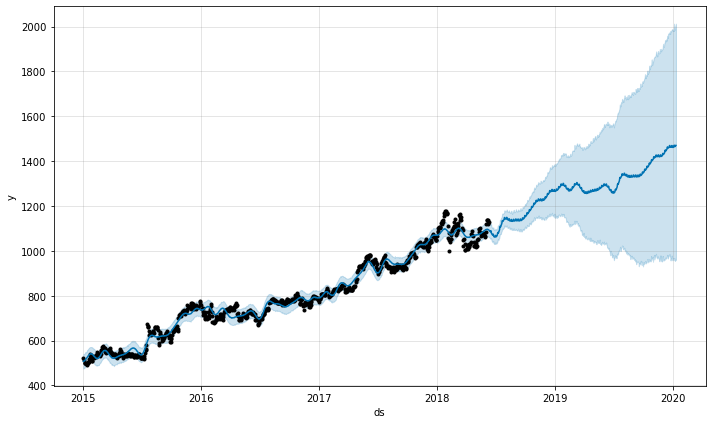

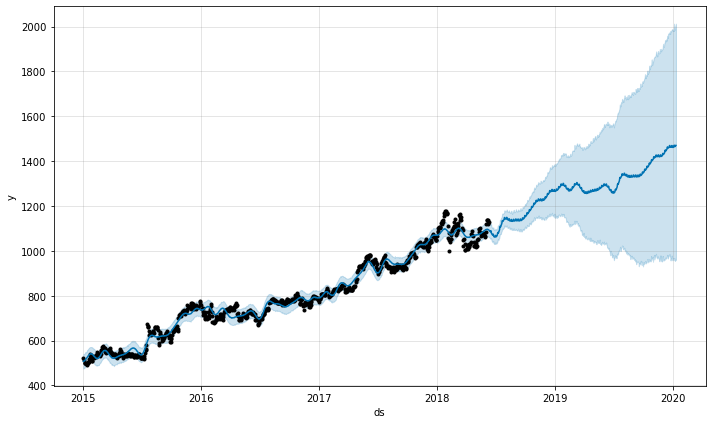

In [10]:

m2.plot(prediction2)

In [11]:
actual_prices = test_data2["y"].tolist()
MSE_error = mean_squared_error(actual_prices, predicted_prices)
print(MSE_error)

11686.309753581523


In [12]:
# report performance
mse = mean_squared_error(actual_prices, predicted_prices)
print('MSE: '+str(mse))
mae = mean_absolute_error(actual_prices, predicted_prices)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(actual_prices, predicted_prices))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(np.array(predicted_prices) - actual_prices)/np.abs(actual_prices))
print('MAPE: '+str(mape))

MSE: 11686.309753581523
MAE: 91.96136826885191
RMSE: 108.10323655460795
MAPE: 0.07654031169908958


## Second model: ARIMA##

In [13]:
#pip install pmdarima 
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('fivethirtyeight')
# from pylab import rcParams
# rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np

In [14]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('GOOG (1).csv',sep=',', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)


In [15]:
print(data['Close'])

Date
2015-01-02     523.373108
2015-01-05     512.463013
2015-01-06     500.585632
2015-01-07     499.727997
2015-01-08     501.303680
                 ...     
2020-09-21    1431.160034
2020-09-22    1465.459961
2020-09-23    1415.209961
2020-09-24    1428.290039
2020-09-25    1444.959961
Name: Close, Length: 1444, dtype: float64


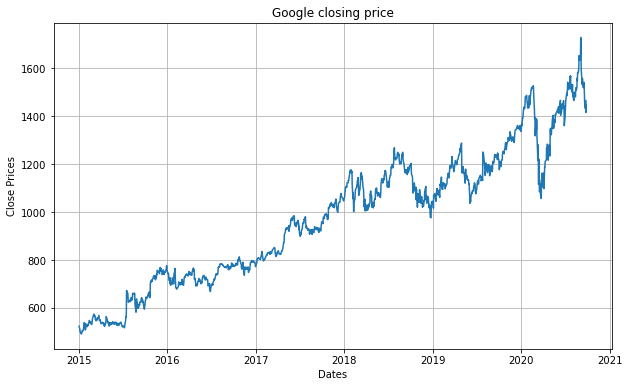

In [16]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(data['Close'])
plt.title('Google closing price')
plt.show()

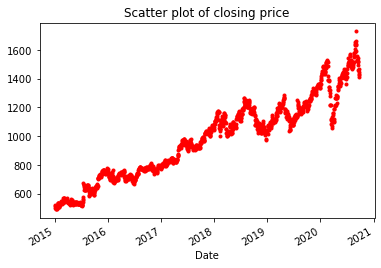

In [17]:
# The plot method on Series and DataFrame is just a simple wrapper around plt.plot():
df_close = data['Close']
#style keyword is used to specify color and marker and linestyle together
df_close.plot(style='r.')
plt.title('Scatter plot of closing price')
plt.show()

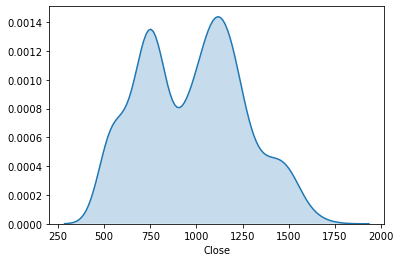

In [18]:
sns.distplot(data['Close'], hist = False, kde_kws={"shade": True})

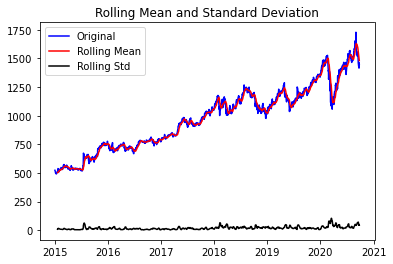

Results of dickey fuller test
Test Statistics                  -0.974213
p-value                           0.762553
No. of lags used                 22.000000
Number of observations used    1421.000000
critical value (1%)              -3.434960
critical value (5%)              -2.863576
critical value (10%)             -2.567854
dtype: float64


In [19]:
#Test for staionarity
timeseries = df_close
#Determing rolling statistics
rolmean = timeseries.rolling(12).mean()
rolstd = timeseries.rolling(12).std()
#Plot rolling statistics:
plt.plot(timeseries, color='blue',label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

print("Results of dickey fuller test")
adft = adfuller(timeseries,autolag='AIC')
# output for dft will give us without defining what the values are.
#hence we manually write what values does it explains using a for loop
output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
output
for key,values in adft[4].items():
    output['critical value (%s)'%key] =  values
print(output)
    

In [20]:
df_close

Date
2015-01-02     523.373108
2015-01-05     512.463013
2015-01-06     500.585632
2015-01-07     499.727997
2015-01-08     501.303680
                 ...     
2020-09-21    1431.160034
2020-09-22    1465.459961
2020-09-23    1415.209961
2020-09-24    1428.290039
2020-09-25    1444.959961
Name: Close, Length: 1444, dtype: float64

<Figure size 432x288 with 0 Axes>

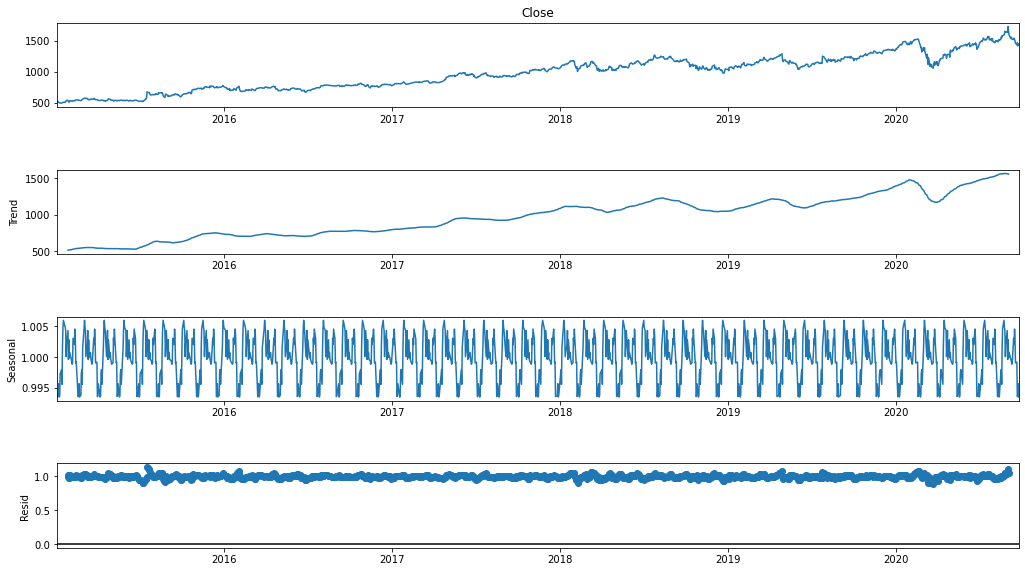

In [21]:
result = seasonal_decompose(df_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

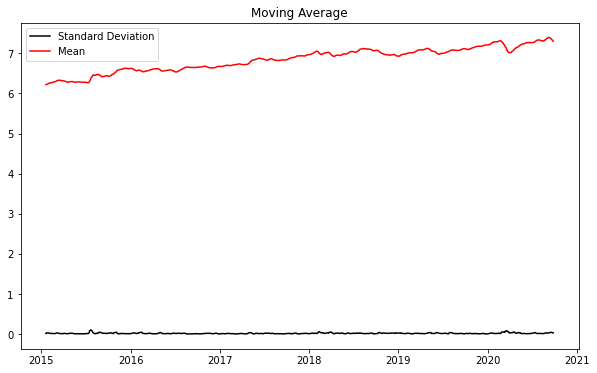

In [22]:
#rcParams is to tailor the graph more easily
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

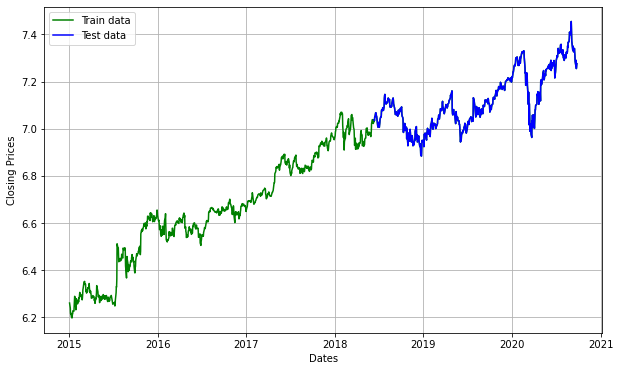

In [23]:
# df_log = df_log[int(len(df_log)*0.8):]
train_data, test_data = df_log[:int(len(df_log)*0.6)], df_log[int(len(df_log)*0.6):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [24]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4866.758, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4868.932, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-4869.119, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4865.502, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-4867.635, Time=0.28 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-4867.534, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-4865.551, Time=0.81 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-4868.294, Time=0.13 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.945 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  866
Model:               SARIMAX(0, 1, 1)   Log Likelihood                2437.560
Date:                Tue, 20 Oct 2020   AIC                          -4869.119
Time:                       

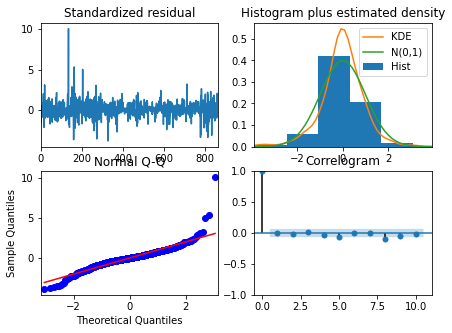

In [25]:
model_autoARIMA.plot_diagnostics(figsize=(7,5))
plt.show()

In [26]:
model = ARIMA(train_data, order=(3, 1, 0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

D:\Downloads-D\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\Downloads-D\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  865
Model:                 ARIMA(3, 1, 0)   Log Likelihood                2437.786
Method:                       css-mle   S.D. of innovations              0.014
Date:                Tue, 20 Oct 2020   AIC                          -4865.571
Time:                        15:06:34   BIC                          -4841.758
Sample:                             1   HQIC                         -4856.457
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0009      0.001      1.708      0.088      -0.000       0.002
ar.L1.D.Close     0.0714      0.034      2.098      0.036       0.005       0.138
ar.L2.D.Close    -0.0258      0.034     

In [27]:
fitted.summary().tables[2]

,Real,Imaginary,Modulus,Frequency
AR.1,-1.2524,-4.1854j,4.3688,-0.2963
AR.2,-1.2524,+4.1854j,4.3688,0.2963
AR.3,4.9356,-0.0000j,4.9356,-0.0000


In [28]:
fitted.params

const            0.000889
ar.L1.D.Close    0.071375
ar.L2.D.Close   -0.025805
ar.L3.D.Close    0.010616
dtype: float64

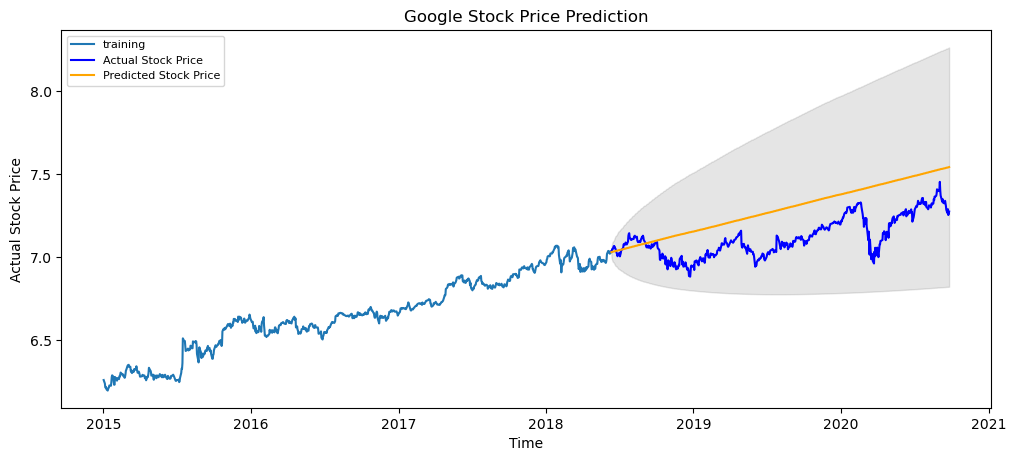

In [29]:
# Forecast
fc, se, conf = fitted.forecast(578, alpha=0.05)  # 95% confidence and 145 days
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [30]:
 pd.Series(conf[:, 0], index=test_data.index)

Date
2018-06-12    7.003010
2018-06-13    6.990526
2018-06-14    6.981903
2018-06-15    6.974666
2018-06-18    6.968381
                ...   
2020-09-21    6.821884
2020-09-22    6.822148
2020-09-23    6.822411
2020-09-24    6.822676
2020-09-25    6.822940
Length: 578, dtype: float64

In [31]:
# report performance (un-logging the data first)
mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: '+str(mse))
mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: '+str(mape))

MSE: 72221.06518952805
MAE: 238.37668365073665
RMSE: 268.7397722510162
MAPE: 0.19223994545406792


## Third model: Random Forest 

#### Being a classification model, the model is only most useful in predicting one, or a few days into the future. Pushing forward with more than a year of prediction did not yield meaningful results, but for the sake of comparison I still included them anyway.

In [32]:
conda install -c fastai -c pytorch -c anaconda fastai gh anaconda

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

## Package Plan ##

  environment location: D:\Downloads-D\anaconda3

  added / updated specs:
    - anaconda
    - fastai
    - gh


The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.9.0-py38h9bdc248~ --> anaconda::conda-4.9.0-py38_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [33]:
#import packages
import math

from time import time
import datetime

import pandas as pd
import numpy as np
#import quandl

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

from IPython.display import Image

In [34]:
df = pd.read_csv('GOOG (1).csv')
# sort df by date
df = df.sort_index(ascending=True, axis=0)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,527.561584,529.815369,522.665039,523.373108,523.373108,1447500
1,2015-01-05,521.827332,522.894409,511.655243,512.463013,512.463013,2059800
2,2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899900
3,2015-01-07,505.611847,505.855164,498.281952,499.727997,499.727997,2065000
4,2015-01-08,496.626526,502.101471,489.655640,501.303680,501.303680,3353500
...,...,...,...,...,...,...,...
1439,2020-09-21,1440.060059,1448.359985,1406.550049,1431.160034,1431.160034,2888800
1440,2020-09-22,1450.089966,1469.520020,1434.530029,1465.459961,1465.459961,1583200
1441,2020-09-23,1458.780029,1460.959961,1407.699951,1415.209961,1415.209961,1657400
1442,2020-09-24,1411.030029,1443.708984,1409.849976,1428.290039,1428.290039,1450200


In [35]:
df['change_in_price'] = df['Close'].diff()

#### Calculating RSI

In [36]:
# Calculate the 14 day RSI
n = 14

# First make a copy of the data frame twice
up_df, down_df = df[['change_in_price']].copy(), df[['change_in_price']].copy()

# For up days, if the change is less than 0 set to 0.
up_df.loc['change_in_price'] = up_df.loc[(up_df['change_in_price'] < 0), 'change_in_price'] = 0

# For down days, if the change is greater than 0 set to 0.
down_df.loc['change_in_price'] = down_df.loc[(down_df['change_in_price'] > 0), 'change_in_price'] = 0

# We need change in price to be absolute.
down_df['change_in_price'] = down_df['change_in_price'].abs()

# Calculate the EWMA (Exponential Weighted Moving Average), meaning older values are given less weight compared to newer values.
ewma_up = up_df['change_in_price'].transform(lambda x: x.ewm(span = n).mean())
ewma_down = down_df['change_in_price'].transform(lambda x: x.ewm(span = n).mean())

# Calculate the Relative Strength
relative_strength = ewma_up / ewma_down

# Calculate the Relative Strength Index
relative_strength_index = 100.0 - (100.0 / (1.0 + relative_strength))

# Add the info to the data frame.
df['down_days'] = down_df['change_in_price']
df['up_days'] = up_df['change_in_price']
df['RSI'] = relative_strength_index
# Display the head.
df.head(30)

,Date,Open,High,Low,Close,Adj Close,Volume,change_in_price,down_days,up_days,RSI
0,2015-01-02,527.561584,529.815369,522.665039,523.373108,523.373108,1447500,NaN,NaN,NaN,NaN
1,2015-01-05,521.827332,522.894409,511.655243,512.463013,512.463013,2059800,-10.910095,10.910095,0.000000,0.000000
2,2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899900,-11.877381,11.877381,0.000000,0.000000
3,2015-01-07,505.611847,505.855164,498.281952,499.727997,499.727997,2065000,-0.857635,0.857635,0.000000,0.000000
4,2015-01-08,496.626526,502.101471,489.655640,501.303680,501.303680,3353500,1.575683,0.000000,1.575683,8.590448
5,2015-01-09,503.377991,503.537537,493.435272,494.811493,494.811493,2071300,-6.492187,6.492187,0.000000,6.099437
6,2015-01-12,493.584869,494.618011,486.225067,491.201416,491.201416,2326700,-3.610077,3.610077,0.000000,5.142641
7,2015-01-13,497.474182,501.602844,491.041840,494.821472,494.821472,2370400,3.620056,0.000000,3.620056,19.714458
8,2015-01-14,493.295654,501.852173,491.650177,499.498627,499.498627,2235700,4.677155,0.000000,4.677155,34.674696
9,2015-01-15,504.185760,504.295471,496.397156,500.416107,500.416107,2715800,0.917480,0.000000,0.917480,37.318349


#### Calculating Stochastic Oscillator

In [37]:
n = 14

# Make a copy of the high and low column.
low_14, high_14 = df[['Low']].copy(), df[['High']].copy()

# Group by symbol, then apply the rolling function and grab the Min and Max.
low_14 = low_14['Low'].transform(lambda x: x.rolling(window = n).min())
high_14 = high_14['High'].transform(lambda x: x.rolling(window = n).max())

# Calculate the Stochastic Oscillator.
k_percent = 100 * ((df['Close'] - low_14) / (high_14 - low_14))

# Add the info to the data frame.
df['low_14'] = low_14
df['high_14'] = high_14
df['k_percent'] = k_percent

# Display the head.
df.head(30)

,Date,Open,High,Low,Close,Adj Close,Volume,change_in_price,down_days,up_days,RSI,low_14,high_14,k_percent
0,2015-01-02,527.561584,529.815369,522.665039,523.373108,523.373108,1447500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,521.827332,522.894409,511.655243,512.463013,512.463013,2059800,-10.910095,10.910095,0.000000,0.000000,NaN,NaN,NaN
2,2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899900,-11.877381,11.877381,0.000000,0.000000,NaN,NaN,NaN
3,2015-01-07,505.611847,505.855164,498.281952,499.727997,499.727997,2065000,-0.857635,0.857635,0.000000,0.000000,NaN,NaN,NaN
4,2015-01-08,496.626526,502.101471,489.655640,501.303680,501.303680,3353500,1.575683,0.000000,1.575683,8.590448,NaN,NaN,NaN
5,2015-01-09,503.377991,503.537537,493.435272,494.811493,494.811493,2071300,-6.492187,6.492187,0.000000,6.099437,NaN,NaN,NaN
6,2015-01-12,493.584869,494.618011,486.225067,491.201416,491.201416,2326700,-3.610077,3.610077,0.000000,5.142641,NaN,NaN,NaN
7,2015-01-13,497.474182,501.602844,491.041840,494.821472,494.821472,2370400,3.620056,0.000000,3.620056,19.714458,NaN,NaN,NaN
8,2015-01-14,493.295654,501.852173,491.650177,499.498627,499.498627,2235700,4.677155,0.000000,4.677155,34.674696,NaN,NaN,NaN
9,2015-01-15,504.185760,504.295471,496.397156,500.416107,500.416107,2715800,0.917480,0.000000,0.917480,37.318349,NaN,NaN,NaN


#### Calculating Price Rate of Change

In [38]:
# Calculate the Price Rate of Change
n = 9

# Calculate the Rate of Change in the Price, and store it in the Data Frame.
df['Price_Rate_Of_Change'] = df['Close'].transform(lambda x: x.pct_change(periods = n))

# Print the first 30 rows
df.head(30)

,Date,Open,High,Low,Close,Adj Close,Volume,change_in_price,down_days,up_days,RSI,low_14,high_14,k_percent,Price_Rate_Of_Change
0,2015-01-02,527.561584,529.815369,522.665039,523.373108,523.373108,1447500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,521.827332,522.894409,511.655243,512.463013,512.463013,2059800,-10.910095,10.910095,0.000000,0.000000,NaN,NaN,NaN,NaN
2,2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899900,-11.877381,11.877381,0.000000,0.000000,NaN,NaN,NaN,NaN
3,2015-01-07,505.611847,505.855164,498.281952,499.727997,499.727997,2065000,-0.857635,0.857635,0.000000,0.000000,NaN,NaN,NaN,NaN
4,2015-01-08,496.626526,502.101471,489.655640,501.303680,501.303680,3353500,1.575683,0.000000,1.575683,8.590448,NaN,NaN,NaN,NaN
5,2015-01-09,503.377991,503.537537,493.435272,494.811493,494.811493,2071300,-6.492187,6.492187,0.000000,6.099437,NaN,NaN,NaN,NaN
6,2015-01-12,493.584869,494.618011,486.225067,491.201416,491.201416,2326700,-3.610077,3.610077,0.000000,5.142641,NaN,NaN,NaN,NaN
7,2015-01-13,497.474182,501.602844,491.041840,494.821472,494.821472,2370400,3.620056,0.000000,3.620056,19.714458,NaN,NaN,NaN,NaN
8,2015-01-14,493.295654,501.852173,491.650177,499.498627,499.498627,2235700,4.677155,0.000000,4.677155,34.674696,NaN,NaN,NaN,NaN
9,2015-01-15,504.185760,504.295471,496.397156,500.416107,500.416107,2715800,0.917480,0.000000,0.917480,37.318349,NaN,NaN,NaN,-0.043864


#### Calculate Moving Average Convergence Divergence

In [39]:
# Calculate the MACD
ema_26 = df['Close'].transform(lambda x: x.ewm(span = 26).mean())
ema_12 = df['Close'].transform(lambda x: x.ewm(span = 12).mean())
macd = ema_12 - ema_26

# Calculate the EMA
ema_9_macd = macd.ewm(span = 9).mean()

# Store the data in the data frame.
df['MACD'] = macd
df['MACD_EMA'] = ema_9_macd

# Print the head.
df.head(30)

,Date,Open,High,Low,Close,Adj Close,Volume,change_in_price,down_days,up_days,RSI,low_14,high_14,k_percent,Price_Rate_Of_Change,MACD,MACD_EMA
0,2015-01-02,527.561584,529.815369,522.665039,523.373108,523.373108,1447500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
1,2015-01-05,521.827332,522.894409,511.655243,512.463013,512.463013,2059800,-10.910095,10.910095,0.000000,0.000000,NaN,NaN,NaN,NaN,-0.244778,-0.135988
2,2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899900,-11.877381,11.877381,0.000000,0.000000,NaN,NaN,NaN,NaN,-0.680212,-0.359031
3,2015-01-07,505.611847,505.855164,498.281952,499.727997,499.727997,2065000,-0.857635,0.857635,0.000000,0.000000,NaN,NaN,NaN,NaN,-0.892551,-0.539762
4,2015-01-08,496.626526,502.101471,489.655640,501.303680,501.303680,3353500,1.575683,0.000000,1.575683,8.590448,NaN,NaN,NaN,NaN,-0.926442,-0.654791
5,2015-01-09,503.377991,503.537537,493.435272,494.811493,494.811493,2071300,-6.492187,6.492187,0.000000,6.099437,NaN,NaN,NaN,NaN,-1.207011,-0.804473
6,2015-01-12,493.584869,494.618011,486.225067,491.201416,491.201416,2326700,-3.610077,3.610077,0.000000,5.142641,NaN,NaN,NaN,NaN,-1.529694,-0.988007
7,2015-01-13,497.474182,501.602844,491.041840,494.821472,494.821472,2370400,3.620056,0.000000,3.620056,19.714458,NaN,NaN,NaN,NaN,-1.549299,-1.122896
8,2015-01-14,493.295654,501.852173,491.650177,499.498627,499.498627,2235700,4.677155,0.000000,4.677155,34.674696,NaN,NaN,NaN,NaN,-1.307251,-1.165483
9,2015-01-15,504.185760,504.295471,496.397156,500.416107,500.416107,2715800,0.917480,0.000000,0.917480,37.318349,NaN,NaN,NaN,-0.043864,-1.069271,-1.143926


#### Calculating William % R

In [40]:
# Calculate the Williams %R
n = 14

# Make a copy of the high and low column.
low_14, high_14 = df[['Low']].copy(), df[['High']].copy()

# Group by symbol, then apply the rolling function and grab the Min and Max.
low_14 = low_14['Low'].transform(lambda x: x.rolling(window = n).min())
high_14 = high_14['High'].transform(lambda x: x.rolling(window = n).max())

# Calculate William %R indicator.
r_percent = ((high_14 - df['Close']) / (high_14 - low_14)) * - 100

# Add the info to the data frame.
df['r_percent'] = r_percent

# Display the head.
df.head(30)

,Date,Open,High,Low,Close,Adj Close,Volume,change_in_price,down_days,up_days,RSI,low_14,high_14,k_percent,Price_Rate_Of_Change,MACD,MACD_EMA,r_percent
0,2015-01-02,527.561584,529.815369,522.665039,523.373108,523.373108,1447500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
1,2015-01-05,521.827332,522.894409,511.655243,512.463013,512.463013,2059800,-10.910095,10.910095,0.000000,0.000000,NaN,NaN,NaN,NaN,-0.244778,-0.135988,NaN
2,2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899900,-11.877381,11.877381,0.000000,0.000000,NaN,NaN,NaN,NaN,-0.680212,-0.359031,NaN
3,2015-01-07,505.611847,505.855164,498.281952,499.727997,499.727997,2065000,-0.857635,0.857635,0.000000,0.000000,NaN,NaN,NaN,NaN,-0.892551,-0.539762,NaN
4,2015-01-08,496.626526,502.101471,489.655640,501.303680,501.303680,3353500,1.575683,0.000000,1.575683,8.590448,NaN,NaN,NaN,NaN,-0.926442,-0.654791,NaN
5,2015-01-09,503.377991,503.537537,493.435272,494.811493,494.811493,2071300,-6.492187,6.492187,0.000000,6.099437,NaN,NaN,NaN,NaN,-1.207011,-0.804473,NaN
6,2015-01-12,493.584869,494.618011,486.225067,491.201416,491.201416,2326700,-3.610077,3.610077,0.000000,5.142641,NaN,NaN,NaN,NaN,-1.529694,-0.988007,NaN
7,2015-01-13,497.474182,501.602844,491.041840,494.821472,494.821472,2370400,3.620056,0.000000,3.620056,19.714458,NaN,NaN,NaN,NaN,-1.549299,-1.122896,NaN
8,2015-01-14,493.295654,501.852173,491.650177,499.498627,499.498627,2235700,4.677155,0.000000,4.677155,34.674696,NaN,NaN,NaN,NaN,-1.307251,-1.165483,NaN
9,2015-01-15,504.185760,504.295471,496.397156,500.416107,500.416107,2715800,0.917480,0.000000,0.917480,37.318349,NaN,NaN,NaN,-0.043864,-1.069271,-1.143926,NaN


In [46]:
df=df.dropna()
df.head(1)

,Date,Open,High,Low,Close,Adj Close,Volume,change_in_price,down_days,up_days,RSI,low_14,high_14,k_percent,Price_Rate_Of_Change,MACD,MACD_EMA,r_percent
13,2015-01-22,520.052185,534.861511,518.2771,532.926819,532.926819,2676900,16.305176,0.0,16.305176,79.627212,486.225067,534.861511,96.022135,0.063082,2.237119,0.050418,-3.977865


In [42]:
TOTAL = df.count()[0]
N_VALID = 578 # Three months
TRAIN = TOTAL - N_VALID

In [47]:
df_small = df
features = ['Open', 'Low', 'High', 'Volume','RSI','k_percent', 'Price_Rate_Of_Change', 'r_percent', 'MACD']

X_df = df_small[features]
y_df = df_small['Close']

X_train, X_val = X_df[:TRAIN], X_df[TRAIN:]
y_train, y_val = y_df[:TRAIN], y_df[TRAIN:]

model = RandomForestRegressor(n_estimators=40, bootstrap=True, min_samples_leaf=25)
model.fit(X_train, y_train)
model.predict(X_val)

array([1131.70153116, 1129.9610556 , 1131.70153116, 1131.70153116,
       1131.70153116, 1131.70153116, 1131.70153116, 1131.70153116,
       1131.70153116, 1131.70153116, 1131.70153116, 1131.70153116,
       1131.70153116, 1131.70153116, 1131.70153116, 1131.70153116,
       1131.70153116, 1131.70153116, 1131.70153116, 1131.70153116,
       1131.70153116, 1131.70153116, 1131.70153116, 1131.70153116,
       1131.70153116, 1131.70153116, 1131.70153116, 1131.70153116,
       1131.70153116, 1131.70153116, 1131.70153116, 1131.70153116,
       1131.70153116, 1131.70153116, 1131.70153116, 1131.70153116,
       1131.70153116, 1131.70153116, 1131.70153116, 1131.70153116,
       1131.70153116, 1131.70153116, 1131.70153116, 1131.70153116,
       1131.70153116, 1131.70153116, 1131.70153116, 1131.70153116,
       1131.70153116, 1131.70153116, 1131.70153116, 1131.70153116,
       1131.70153116, 1131.70153116, 1131.70153116, 1131.70153116,
       1131.70153116, 1131.70153116, 1131.70153116, 1131.70153

In [50]:
model.predict(X_val)[0]

1131.7015311625207

In [51]:
forecast_forest = model.predict(X_val)

In [52]:
real = y_df[TRAIN:]

In [53]:
# report performance
mse = mean_squared_error(real, forecast_forest)
print('MSE: '+str(mse))
mae = mean_absolute_error(real, forecast_forest)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(real, forecast_forest))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(np.array(forecast_forest) - real)/np.abs(real))
print('MAPE: '+str(mape))

MSE: 36435.77412896649
MAE: 134.21113527933377
RMSE: 190.88157095164135
MAPE: 0.09673850802948439
